### Modelling and Analysis of Complex Networks
## Exercise 3
Name: Rukhsar Ahmed

# First of all we import our dataset using pandas library.

In [1]:
'Selecting dataset is Group 4'
import pandas as pd
facebook_edges=pd.read_csv('414.edges',header=None)
twitter_edges=pd.read_csv('1046661.edges',header=None)
print("Total Facebook Network are ",facebook_edges.head(5))
print("Total Twitter network are ",twitter_edges.head(5))

Total Facebook Network are           0
0  650 647
1  461 544
2  614 515
3  363 348
4  436 428
Total Twitter network are                   0
0  1044771 7423322
1  9921142 4556941
2  2916671 1049111
3    17743 1452261
4  1403031 1049981


Here we can see that we have two nodes in every row and also notice that these nodes are connected by an edge. First we separate these nodes using numpy library because we have two different network so we apply this process twice.

In [2]:
import networkx as nx
import numpy as np
facebook_edges[['edge1', 'edge2']] = facebook_edges[0].apply(lambda x: pd.Series(str(x).split(" ")))
list_facebook_edges=list(zip(facebook_edges['edge1'],facebook_edges['edge2']))
twitter_edges[['edge1', 'edge2']] = twitter_edges[0].apply(lambda x: pd.Series(str(x).split(" ")))
list_twitter_edges=list(zip(twitter_edges['edge1'],twitter_edges['edge2']))
facebook_network = nx.from_edgelist(list_facebook_edges)
twitter_network = nx.from_edgelist(list_twitter_edges)


# (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of  k and p.


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
facebook_nd=facebook_network.number_of_nodes()#number of node in facebook ego

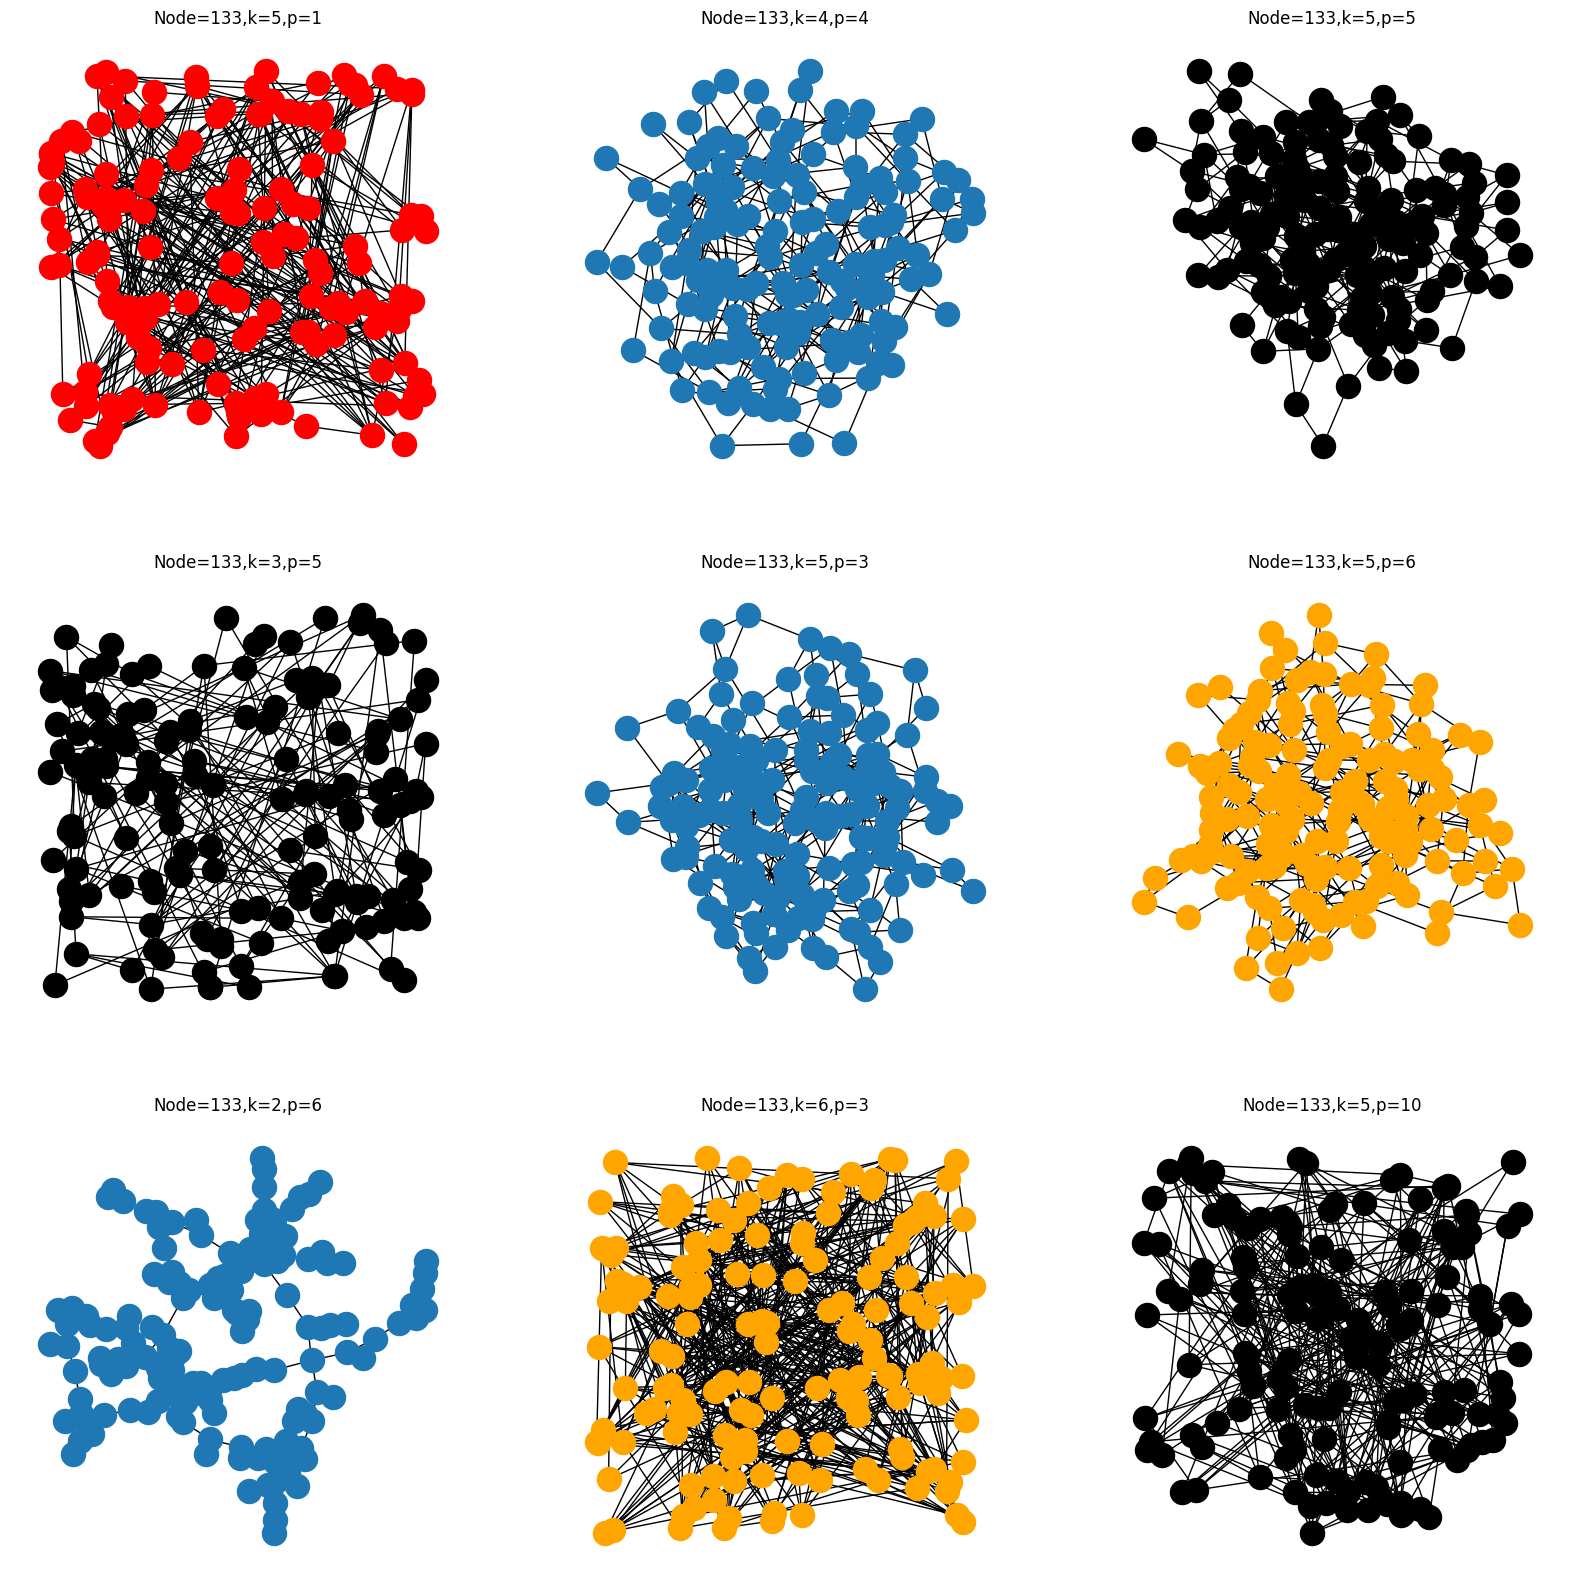

In [4]:
fig, ax = plt.subplots(3, 3,figsize=(20, 20) )
ax[0][0].set_title("Node=133,k=5,p=1")
ax[0][1].set_title("Node=133,k=4,p=4")
ax[0][2].set_title("Node=133,k=5,p=5")
ax[1][0].set_title("Node=133,k=3,p=5")
ax[1][1].set_title("Node=133,k=5,p=3")
ax[1][2].set_title("Node=133,k=5,p=6")
ax[2][0].set_title("Node=133,k=2,p=6")
ax[2][1].set_title("Node=133,k=6,p=3")
ax[2][2].set_title("Node=133,k=5,p=10")

G0=nx.watts_strogatz_graph(facebook_nd,5,1,seed=None)
nx.draw_random(G0,ax=ax[0][0],node_color='red',)

G1=nx.watts_strogatz_graph(facebook_nd,4,4,seed=None)
nx.draw(G1,ax=ax[0][1],)

G2=nx.watts_strogatz_graph(facebook_nd,5,5,seed=None)
nx.draw(G2,ax=ax[0][2],node_color='black',)

G3=nx.watts_strogatz_graph(facebook_nd,3,5,seed=None)
nx.draw_random(G3,ax=ax[1][0], node_color='black',)

G4=nx.watts_strogatz_graph(facebook_nd,5,3,seed=None)
nx.draw(G4,ax=ax[1][1], )

G5=nx.watts_strogatz_graph(facebook_nd,5,6,seed=None)
nx.draw(G5,ax=ax[1][2],node_color='orange',)

G6=nx.watts_strogatz_graph(facebook_nd,2,6,seed=None)
nx.draw(G6,ax=ax[2][0], )

G7=nx.watts_strogatz_graph(facebook_nd,6,3,seed=None)
nx.draw_random(G7,ax=ax[2][1],node_color='orange')

G8=nx.watts_strogatz_graph(facebook_nd,5,10,seed=None)
nx.draw_random(G8,ax=ax[2][2], node_color='black',)

## Degree distribution & clusetering coefficeient

In [5]:
def plot_degree_dist_cluster(G,x):
    fig, (ax2,ax3) = plt.subplots(ncols=2 ,figsize=(16, 7))
    lcc = nx.clustering(G)
    ax2.hist(lcc.values(), bins=10)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f"Clustering coefficient of {x}")
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    ax3.bar(*np.unique(degree_sequence, return_counts=True))
    ax3.set_title(f"Degree Distribution plot of {x}")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("Number of Nodes")
    plt.tight_layout()
    plt.show()

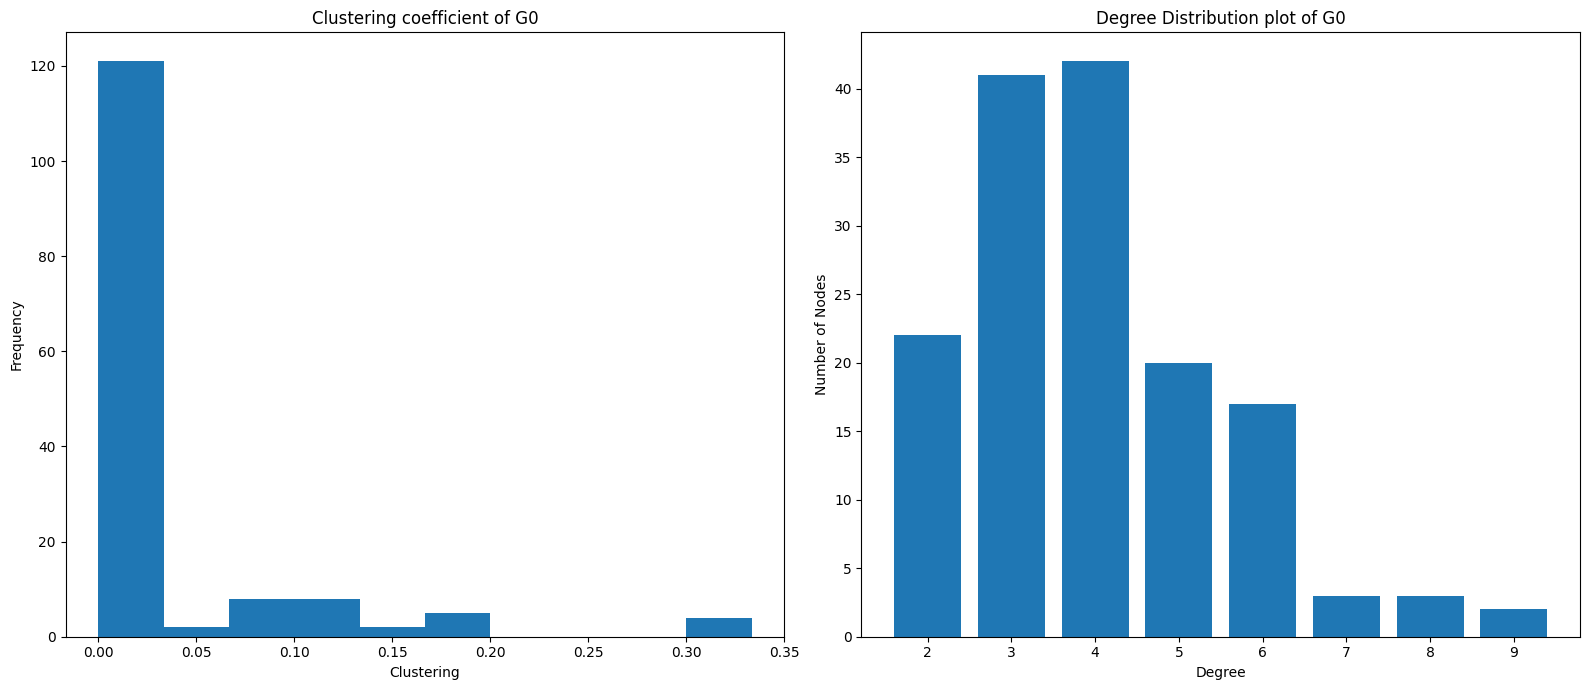

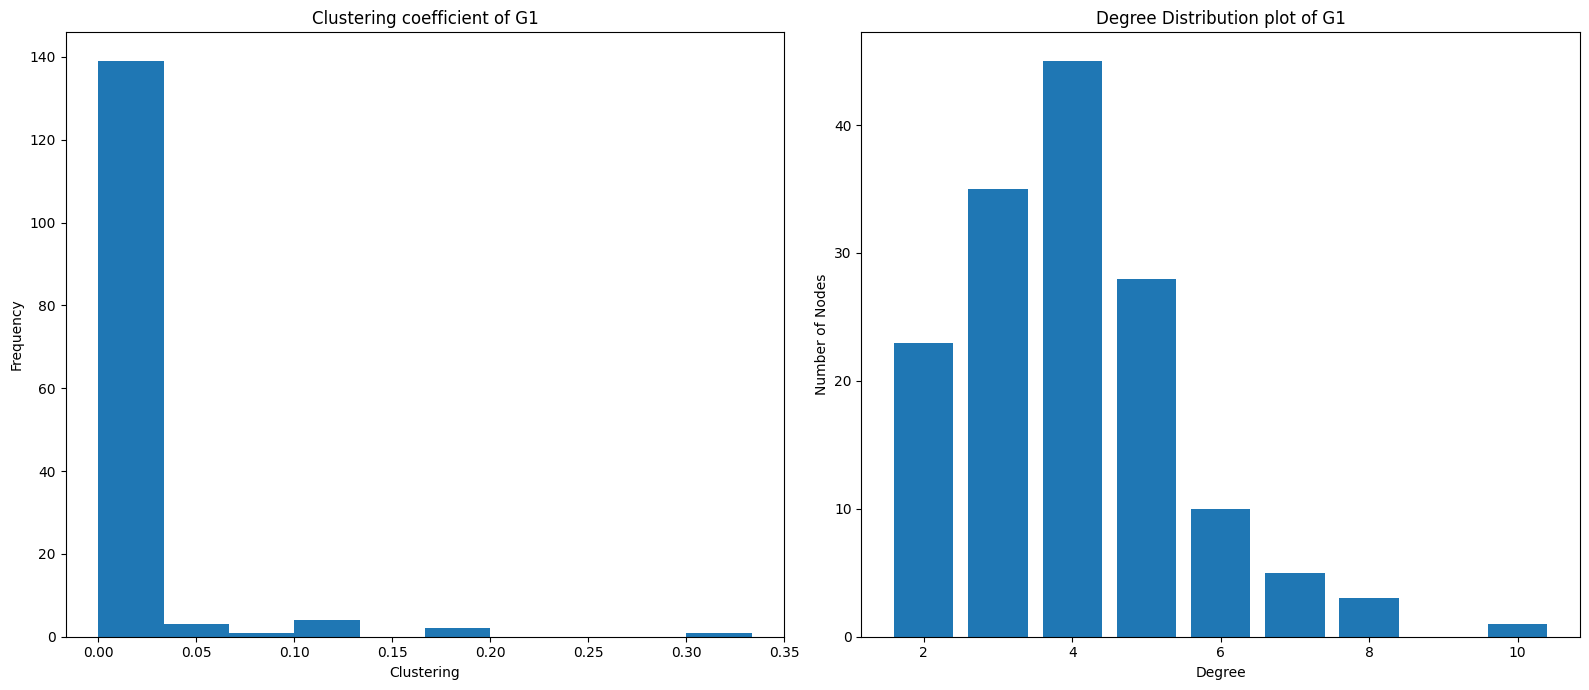

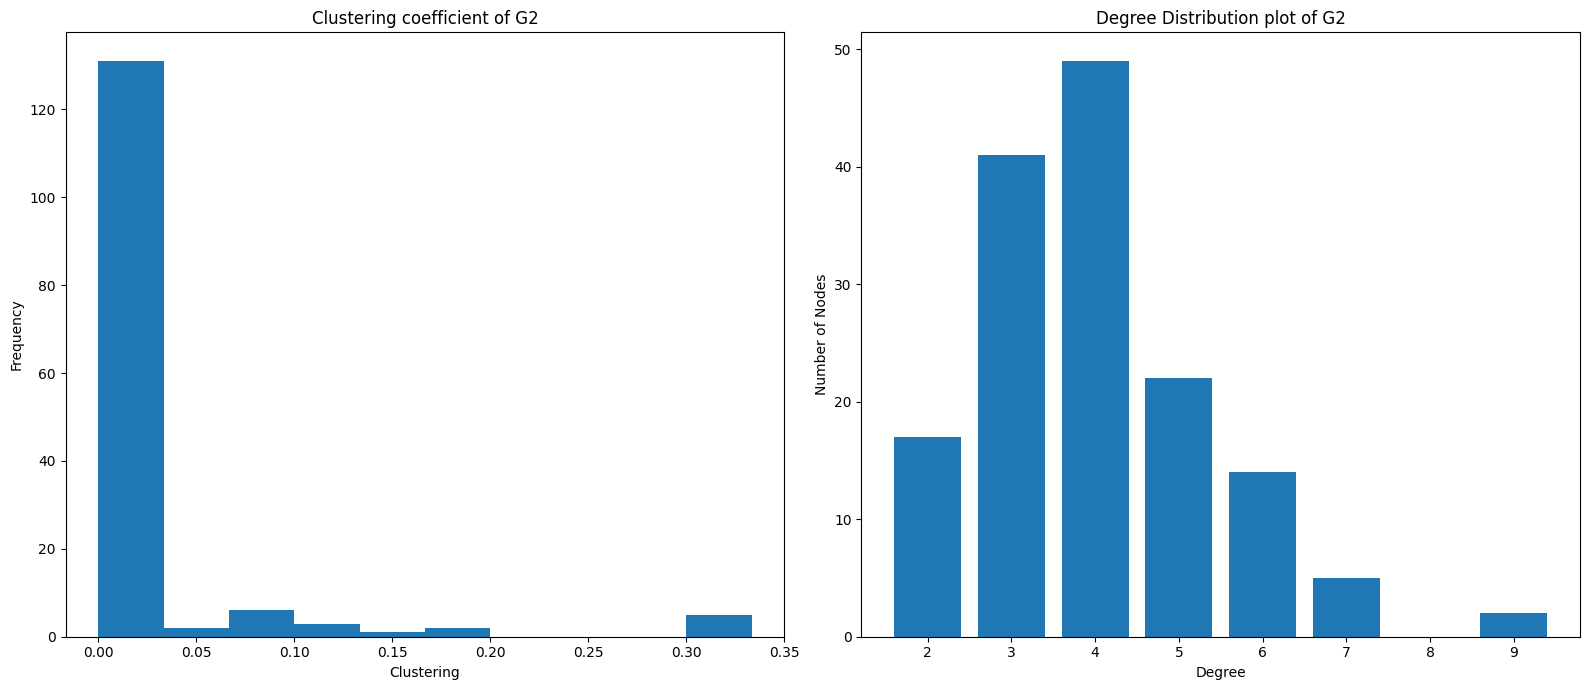

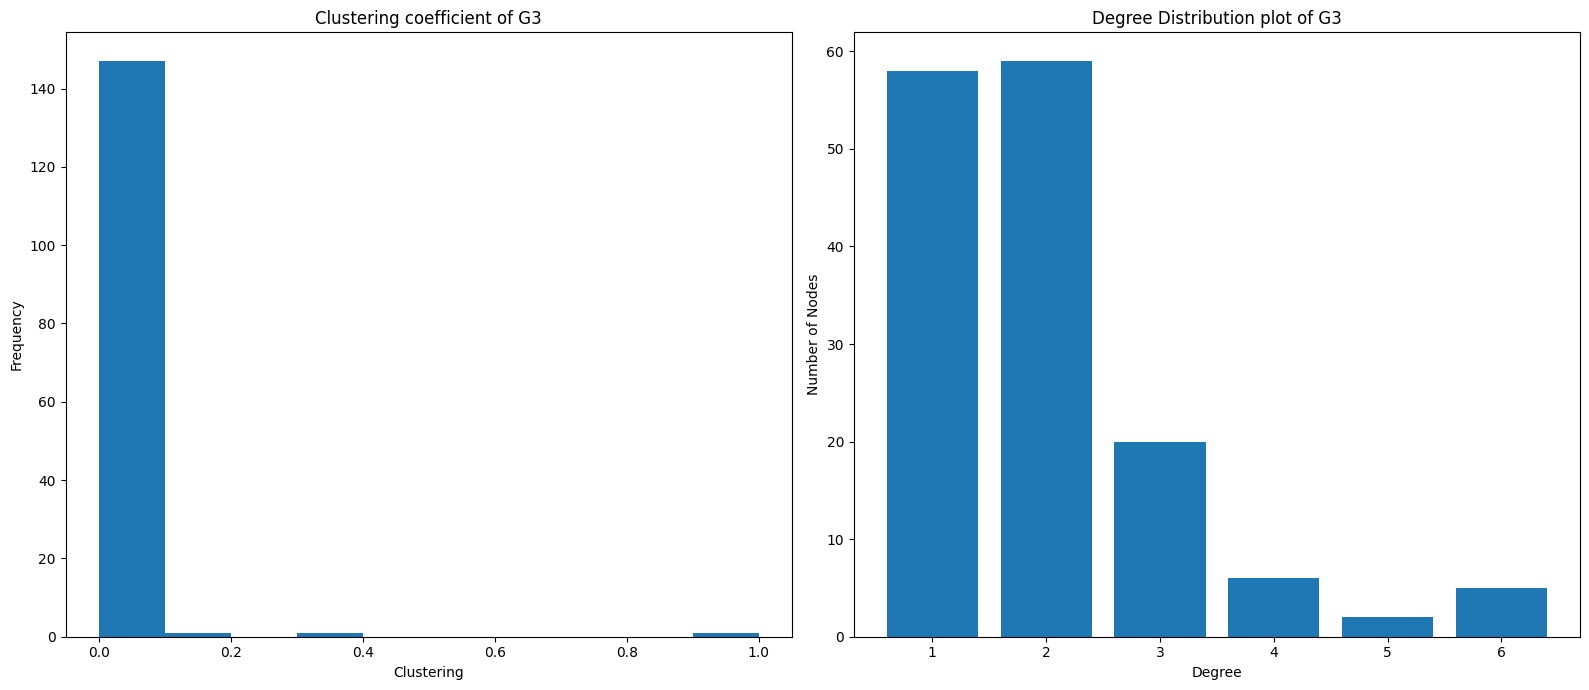

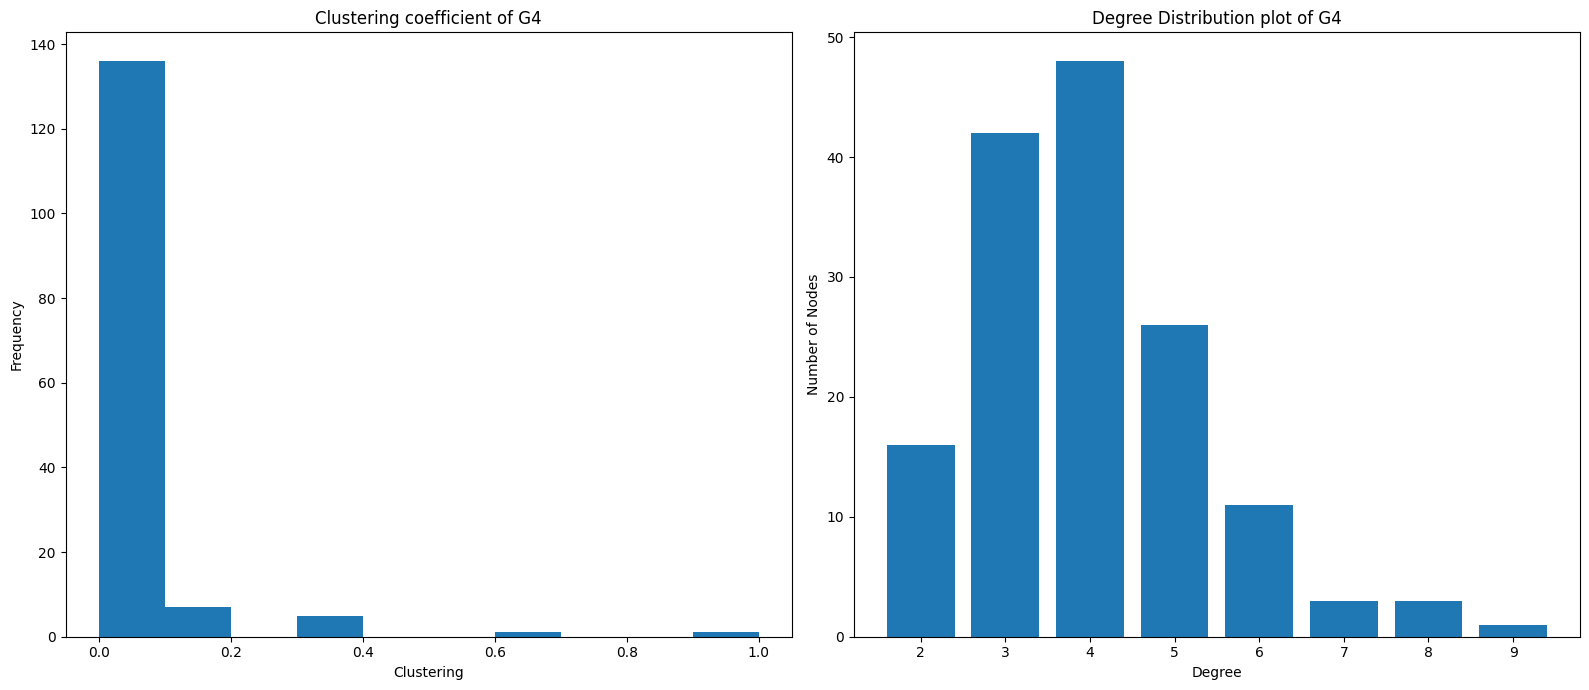

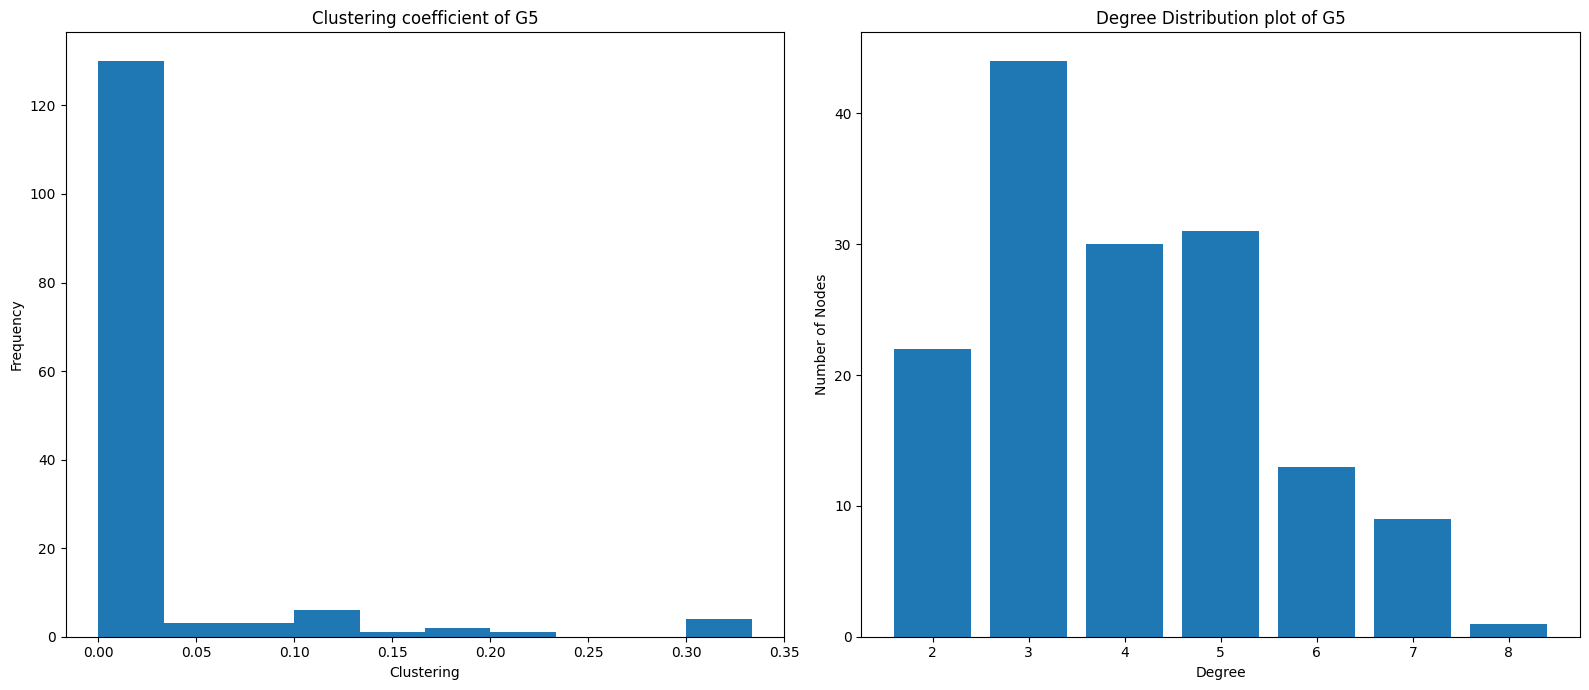

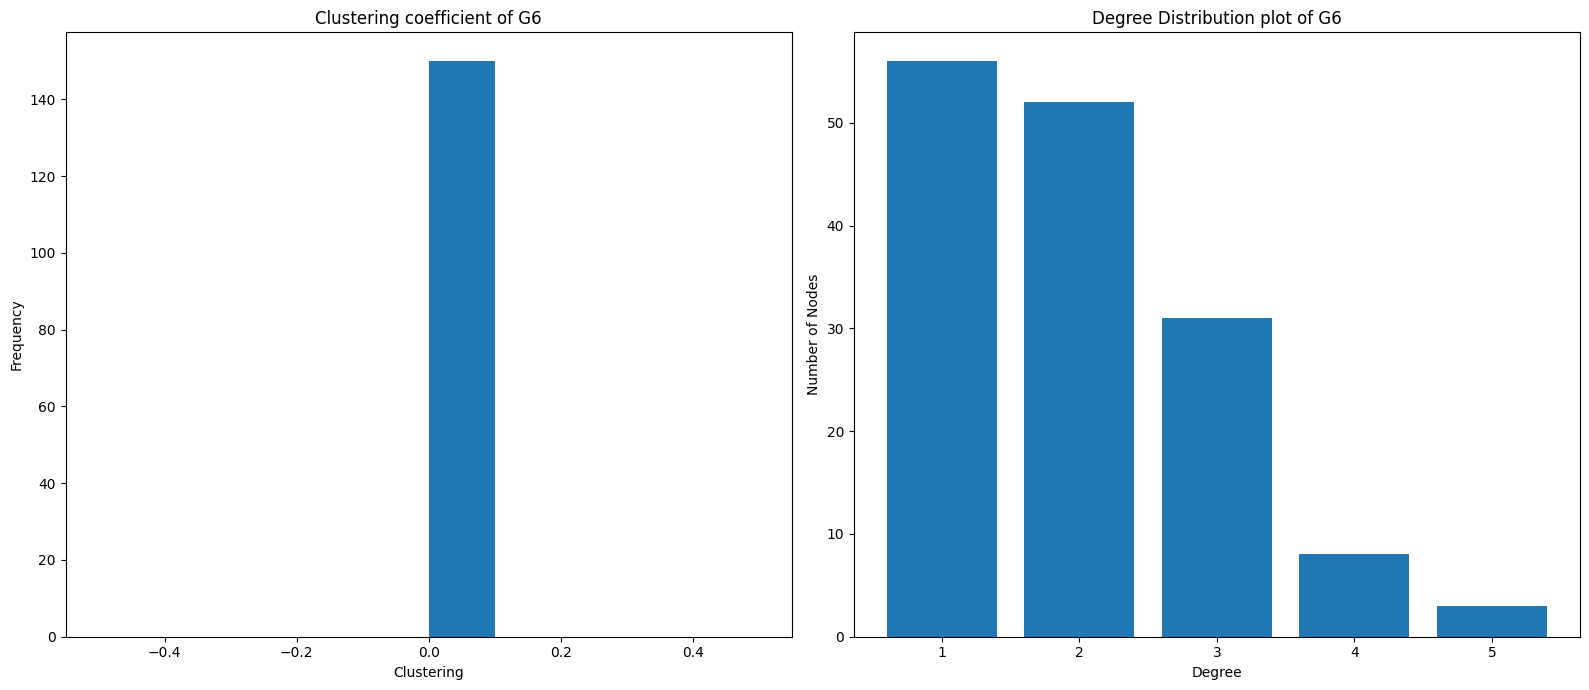

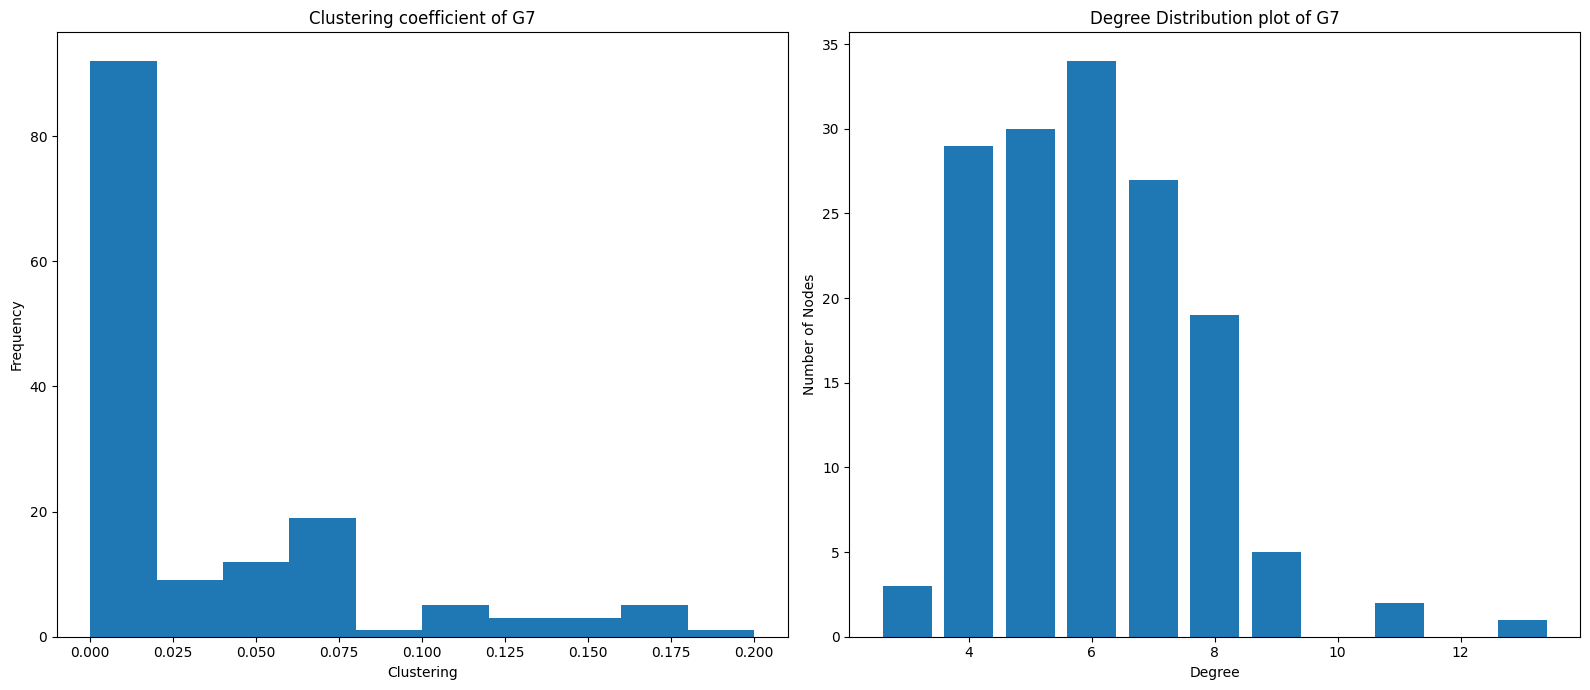

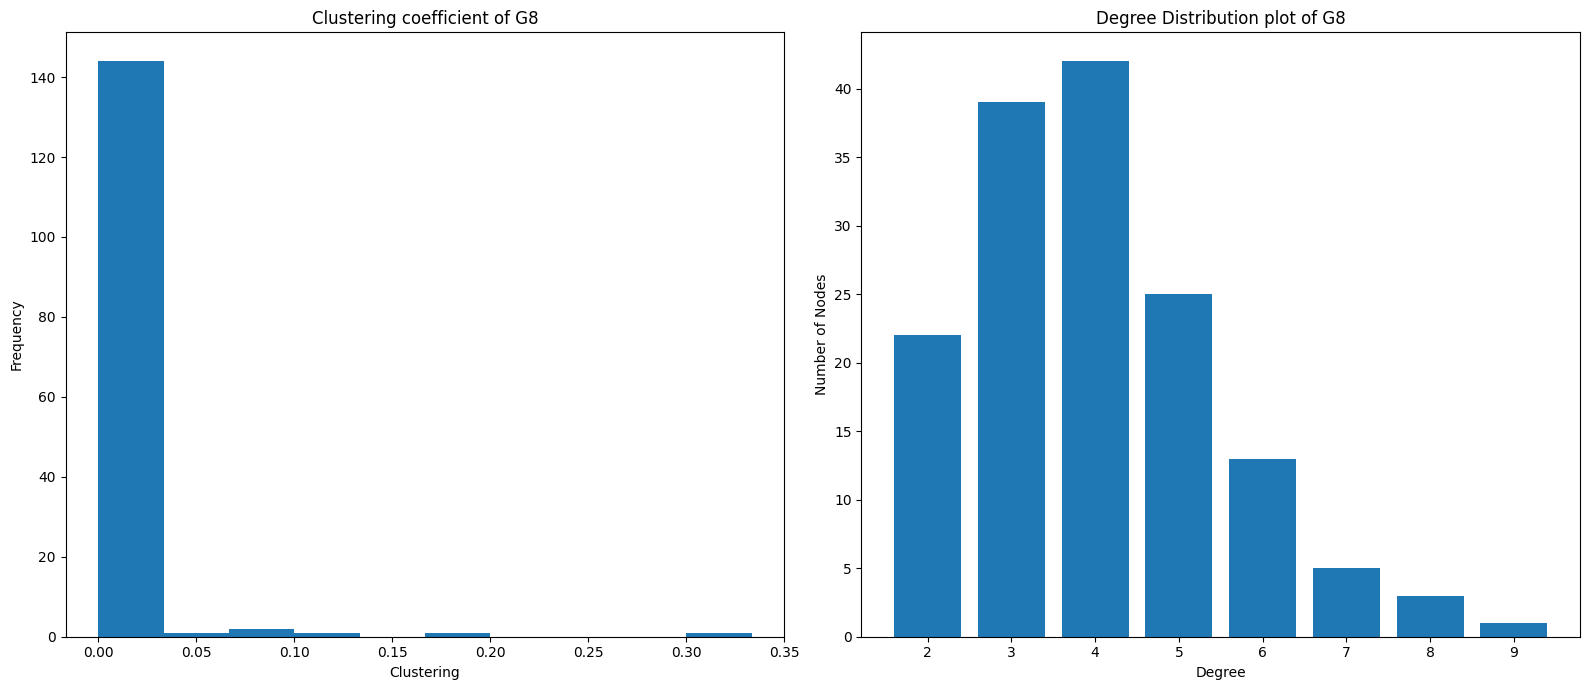

In [6]:
plot_degree_dist_cluster(G0,'G0')
plot_degree_dist_cluster(G1,'G1')
plot_degree_dist_cluster(G2,'G2')
plot_degree_dist_cluster(G3,'G3')
plot_degree_dist_cluster(G4,'G4')
plot_degree_dist_cluster(G5,'G5')
plot_degree_dist_cluster(G6,'G6')
plot_degree_dist_cluster(G7,'G7')
plot_degree_dist_cluster(G8,'G8')


# (b) Generate scale-free graphs, and each of them should have the same number of nodes as FacebookEgo. Please generate 3 graphs with three different values of γ. Please plot the graph structures, degree distributions, and clustering coefficients as well.




In [7]:
def plot_graph_coef_degdis(i,x):
    G=nx.barabasi_albert_graph(facebook_nd, i, seed=25)
    fig, (ax1, ax2,ax3) = plt.subplots(ncols=3 ,figsize=(16, 7))
    lcc = nx.clustering(G)
    nx.draw_random(G,ax=ax1)
    ax2.hist(lcc.values(), bins=10)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    ax3.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title(f"Scale free garph with gamma {i}  Graph, Clustering coefficient & Degree Distribution")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("Number of Nodes")
    plt.tight_layout()
    plt.show()


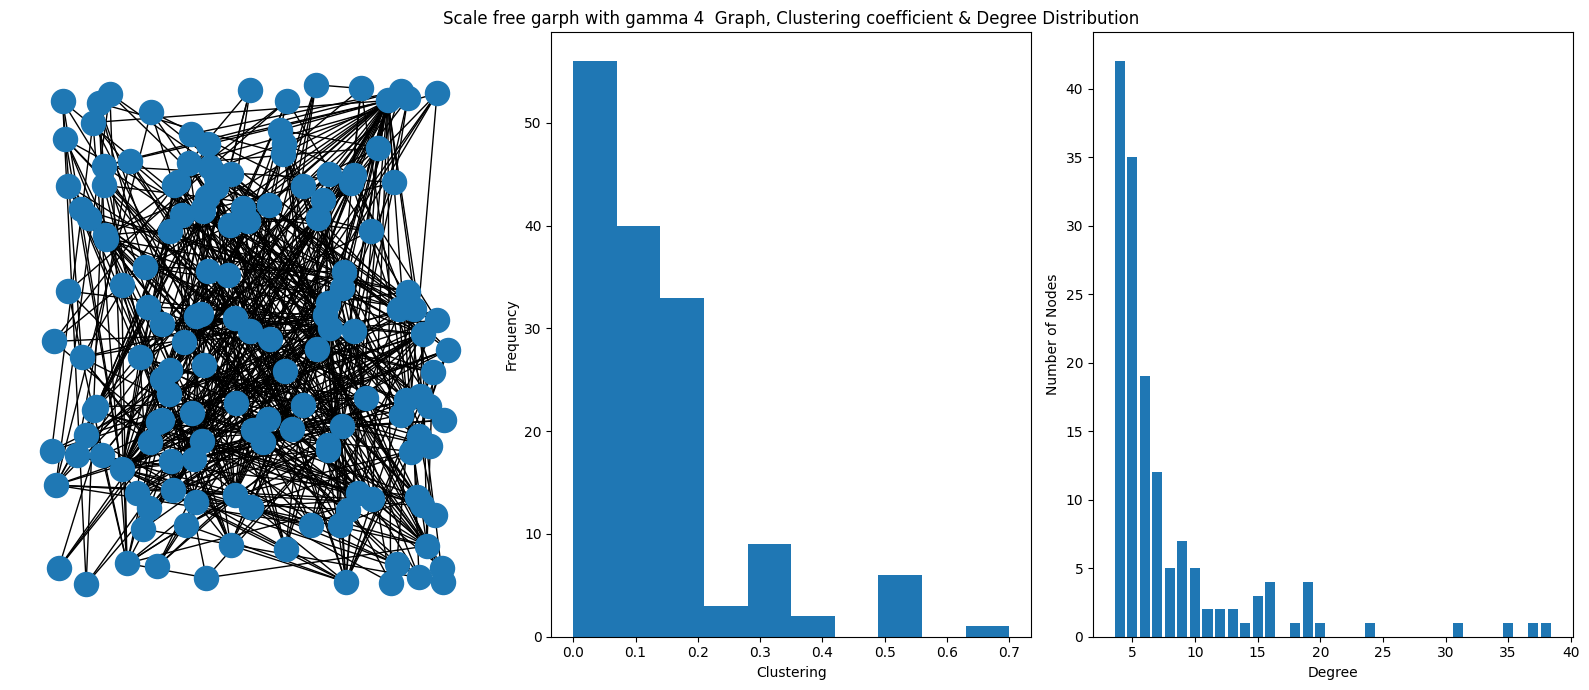

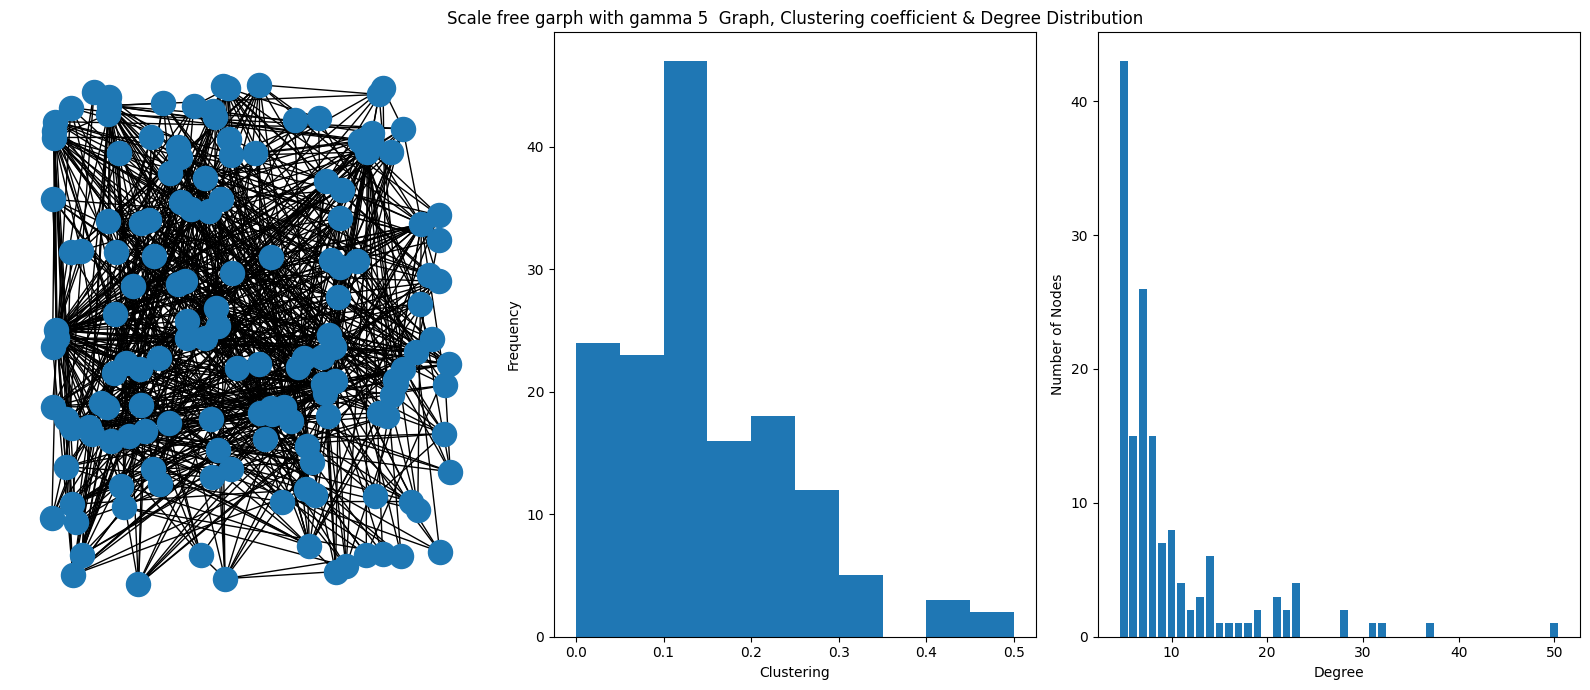

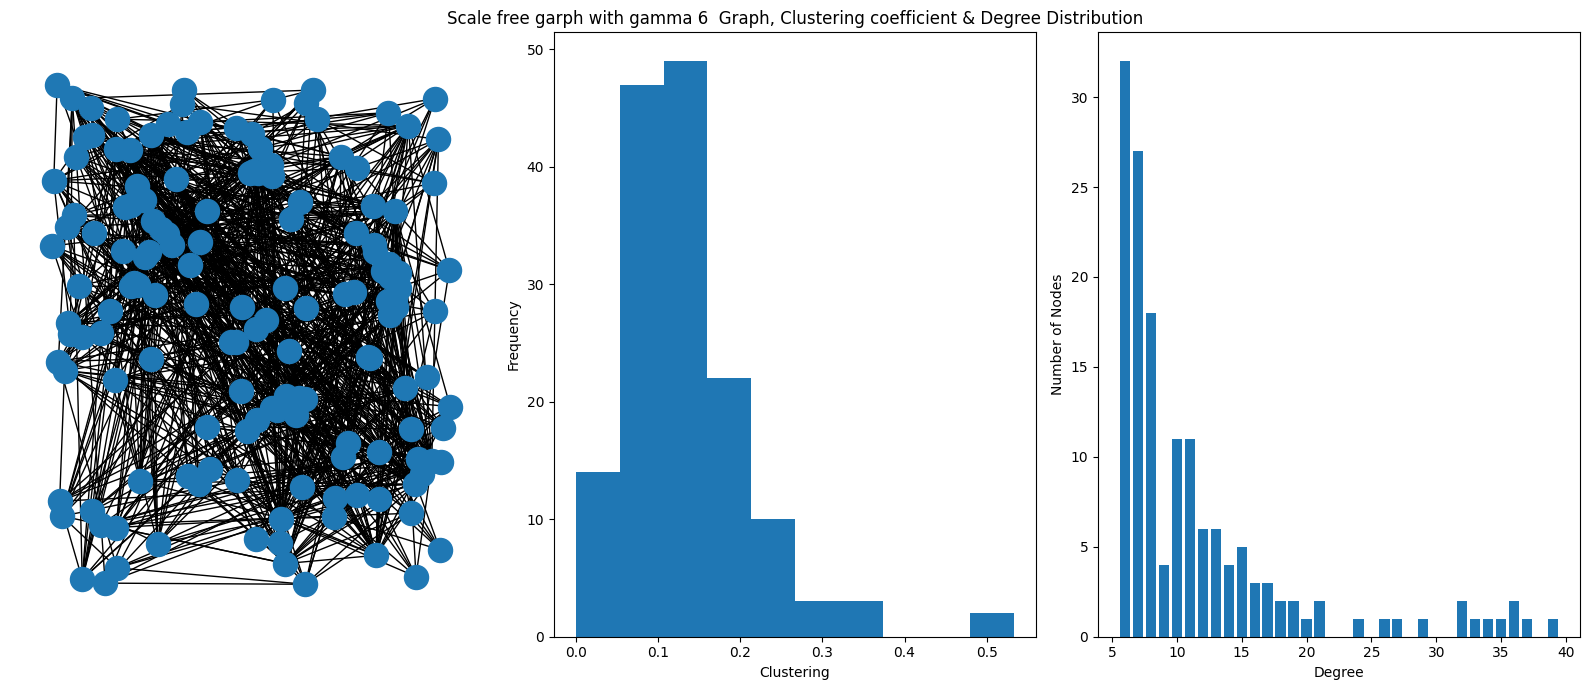

In [8]:
plot_graph_coef_degdis(4,'G0')
plot_graph_coef_degdis(5,'G1')
plot_graph_coef_degdis(6,'G2')


# (c) Generate graphs based on Barab´asi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well.




In [9]:
def barabasi_graph(G,x,m,m0):
    fig, (ax1, ax2,ax3) = plt.subplots(ncols=3 ,figsize=(16, 7))
    lcc = nx.clustering(G)
    nx.draw(G,ax=ax1)
    ax2.hist(lcc.values(), bins=10)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    ax3.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title(f"barabasi_albert_graph m0={m0} m1={m}  Graph, Clustering coefficient & Degree Distribution")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("Number of Nodes")
    plt.tight_layout()
    plt.show()

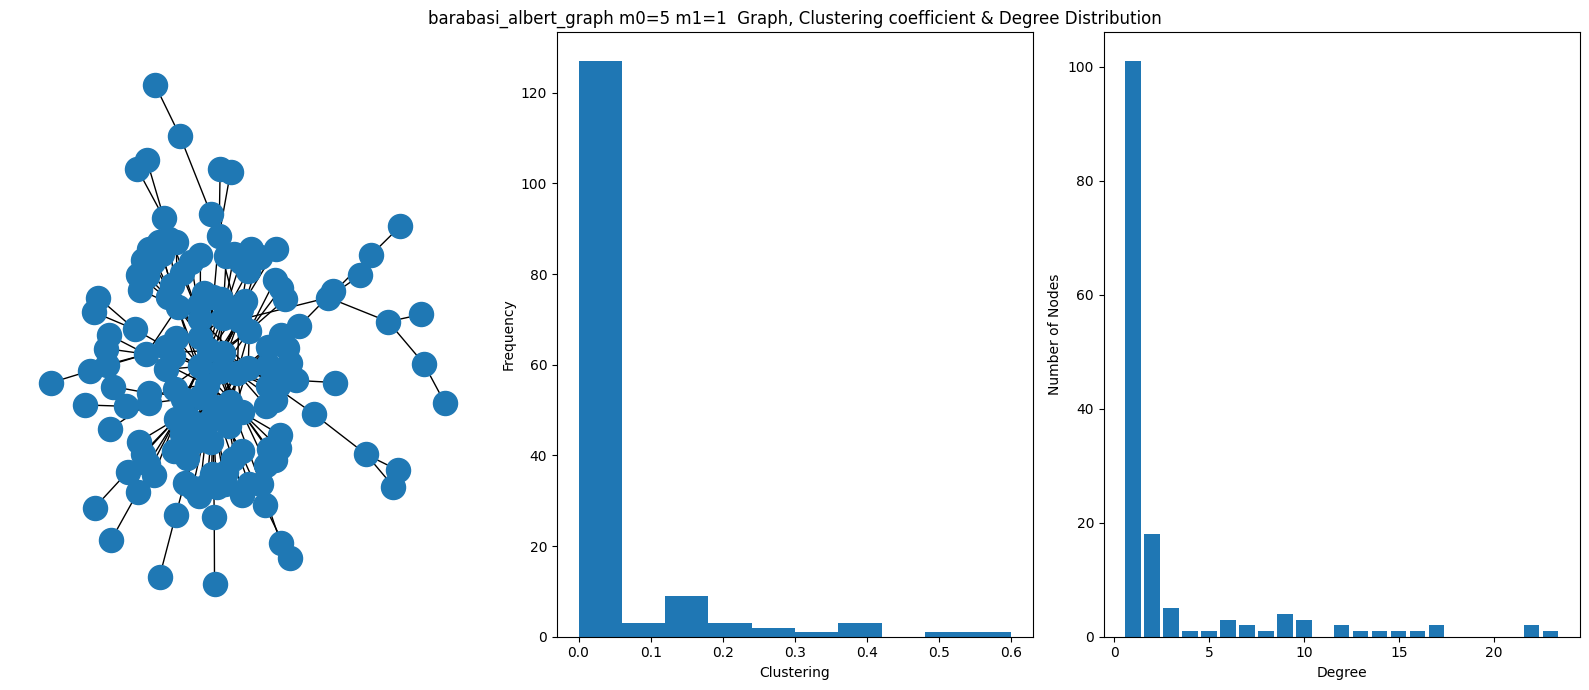

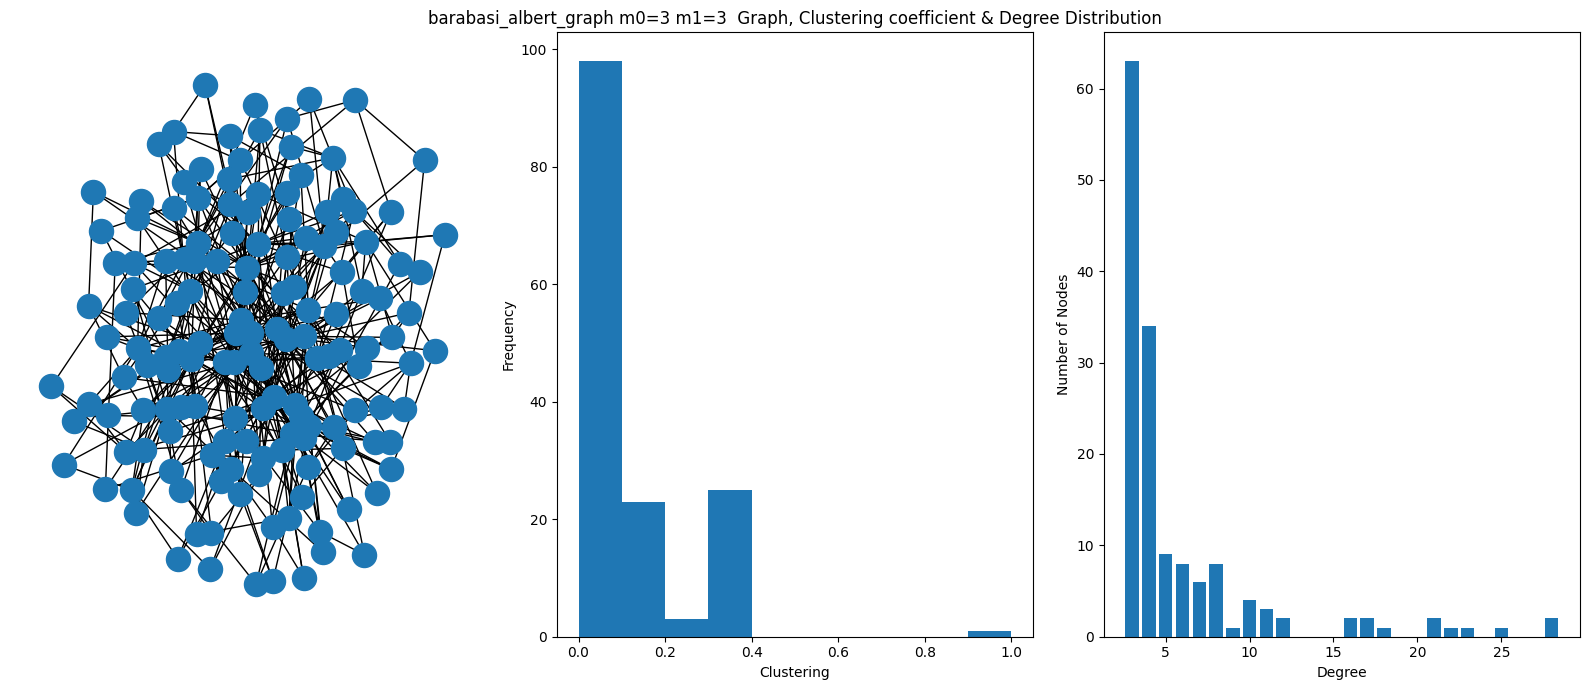

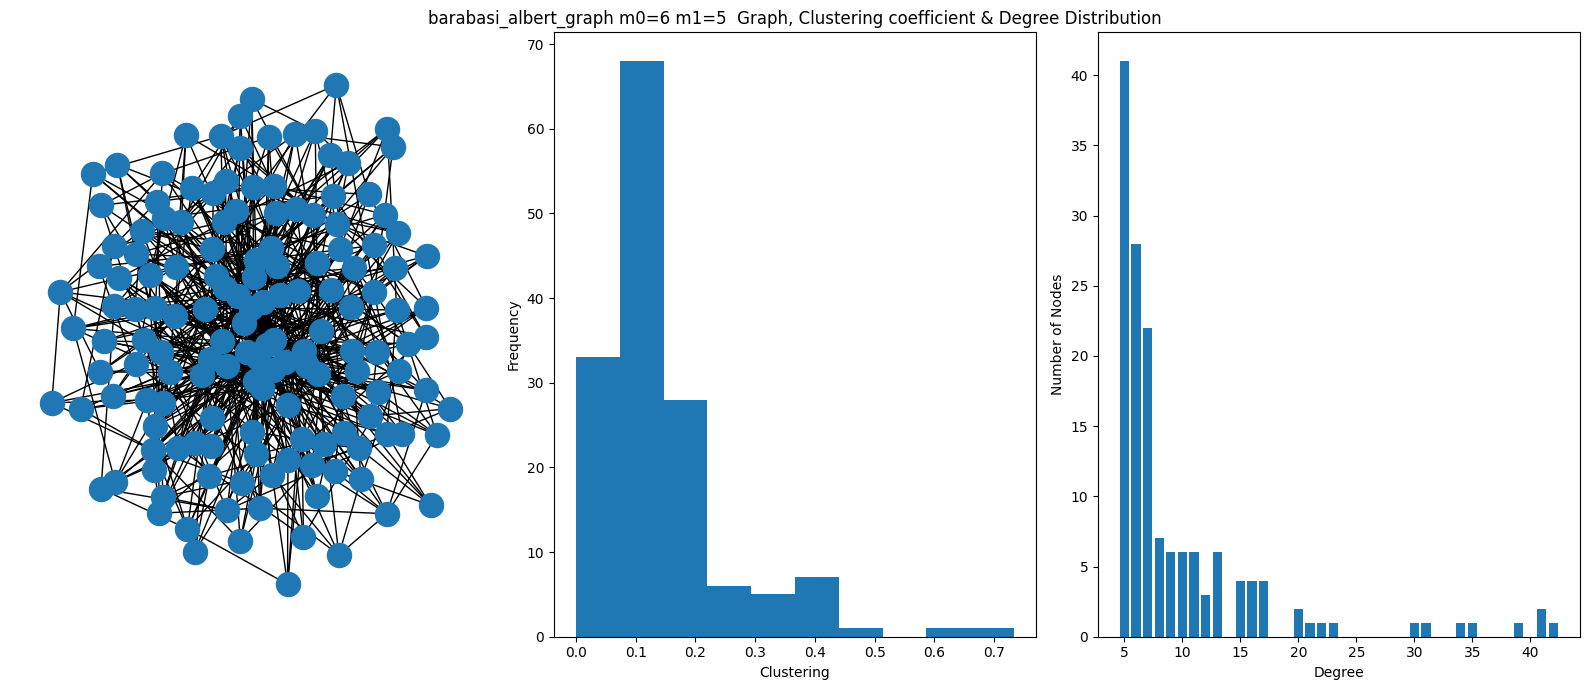

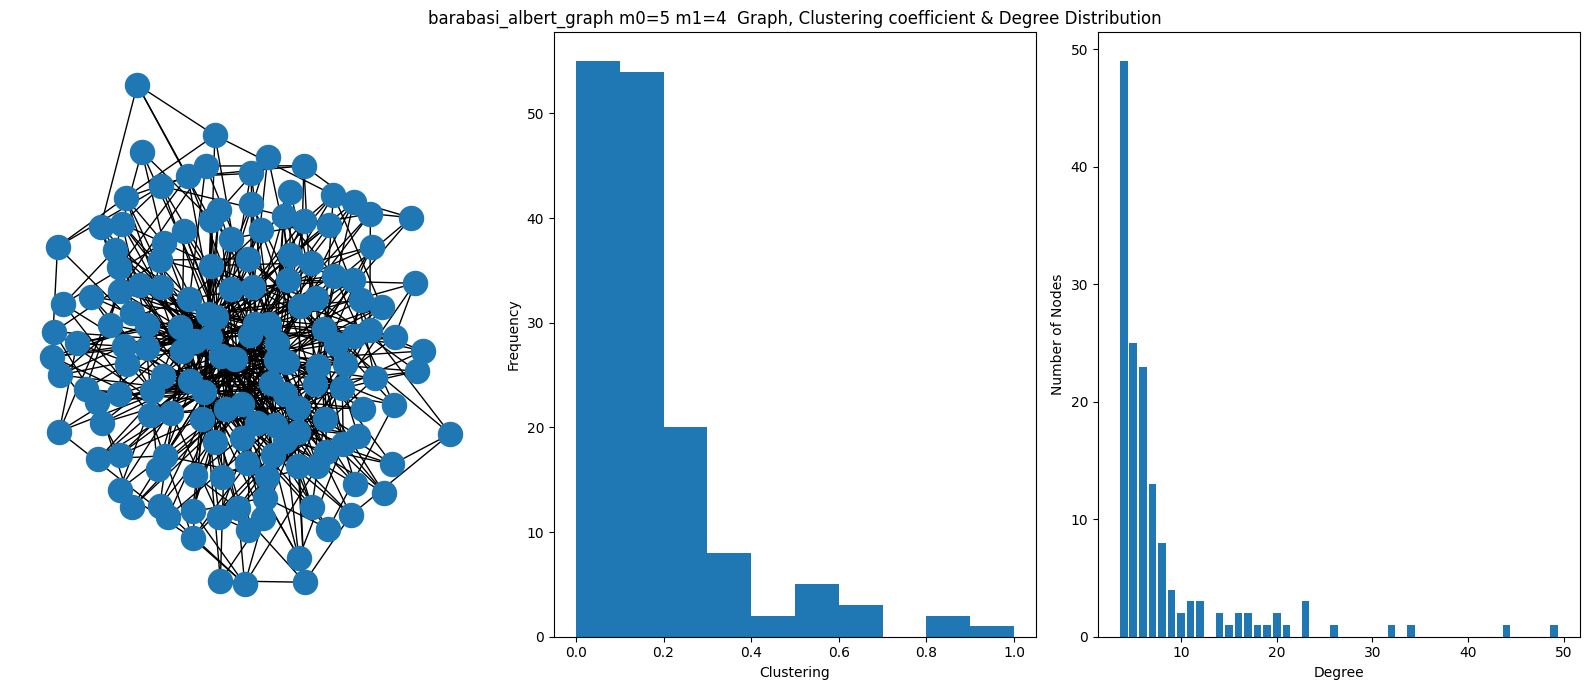

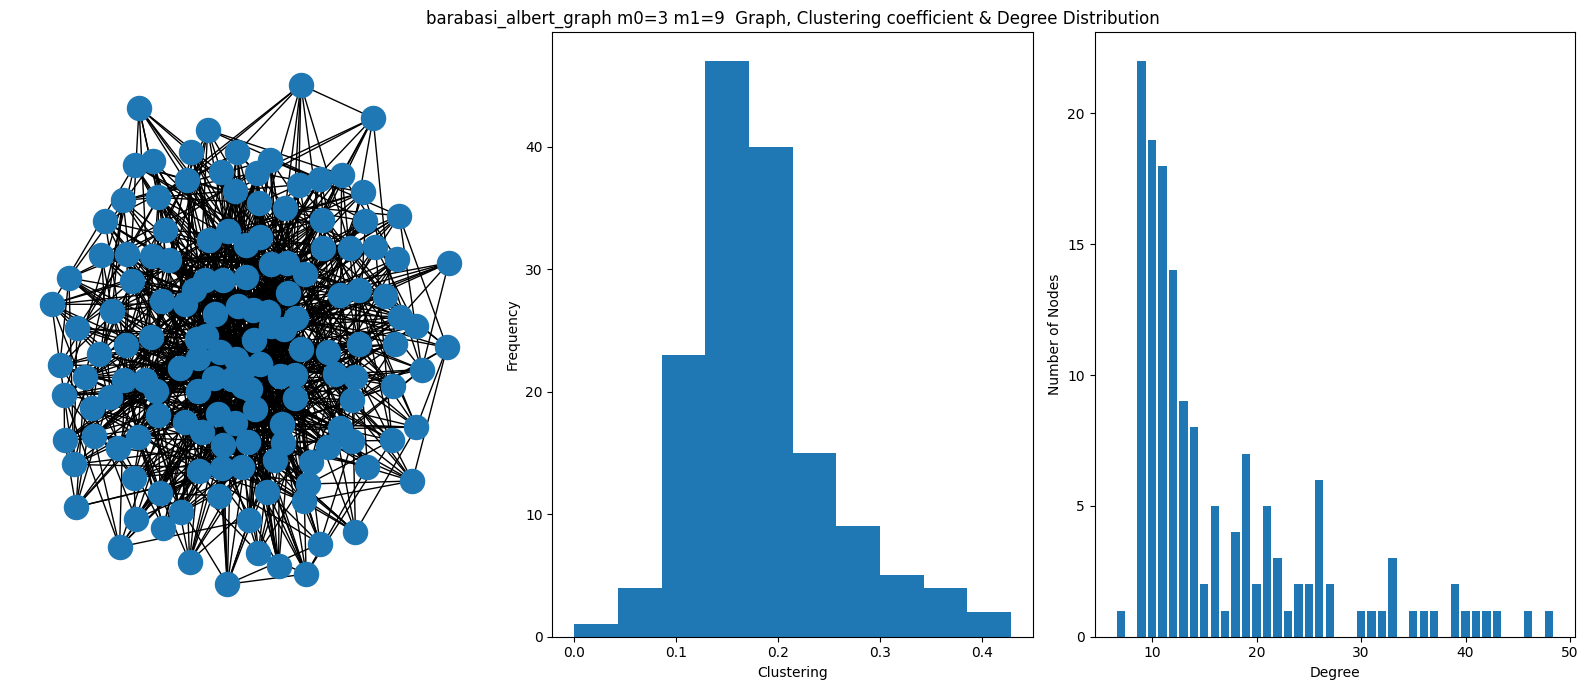

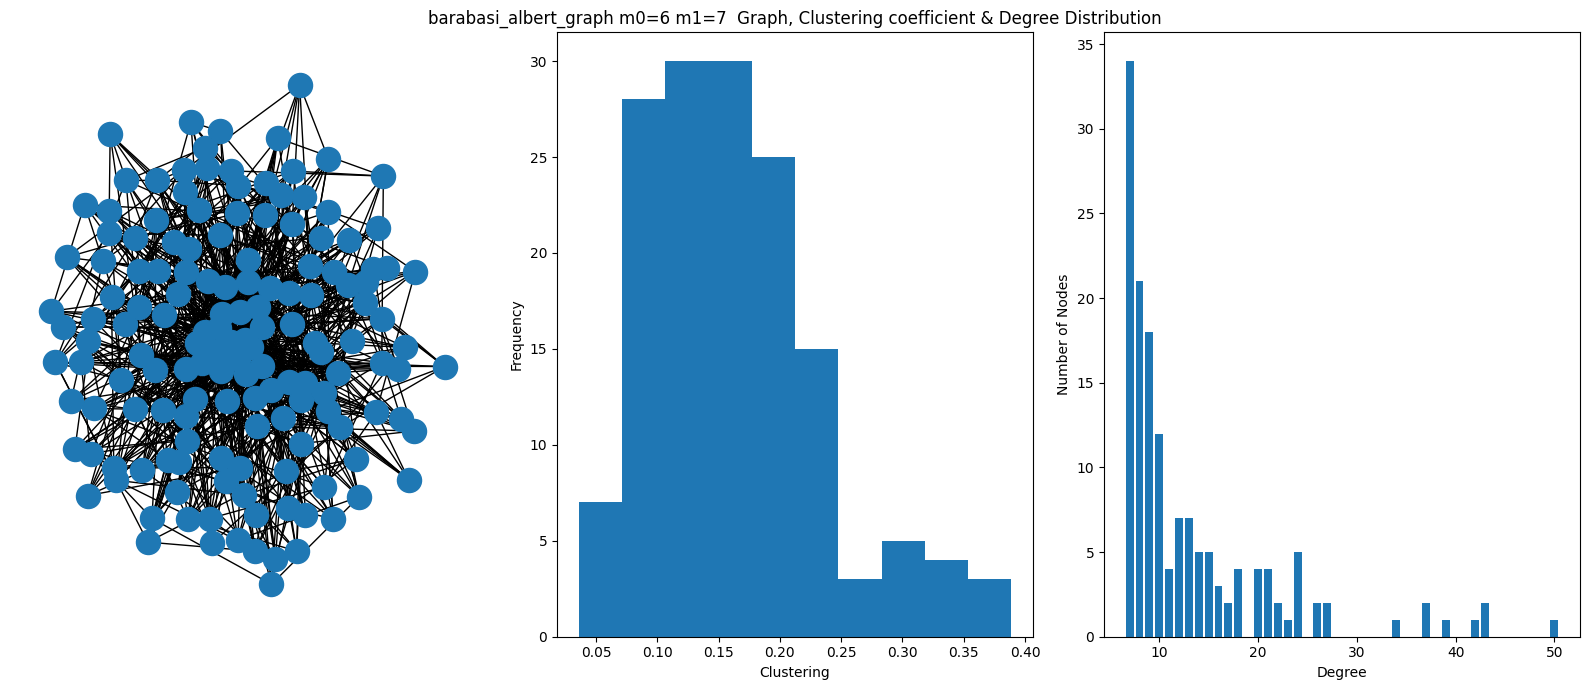

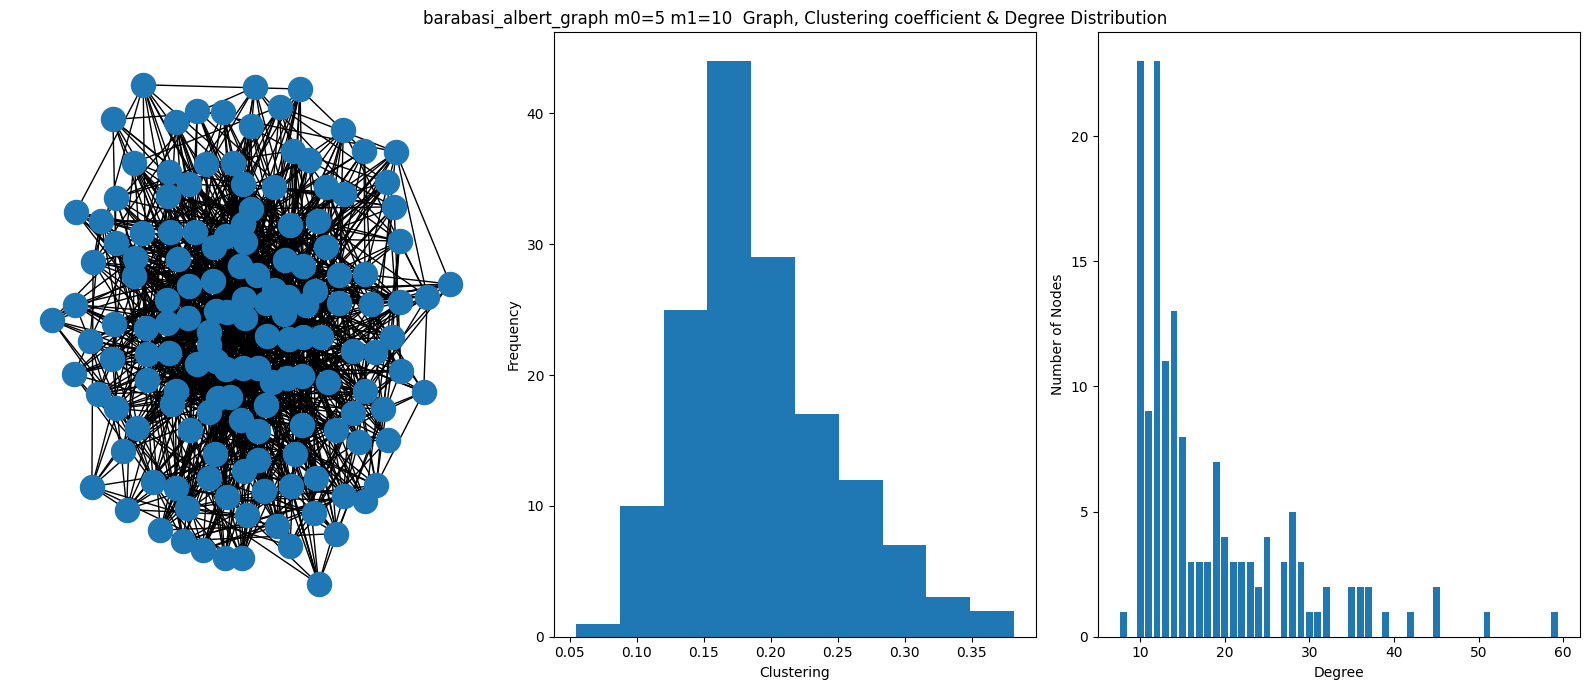

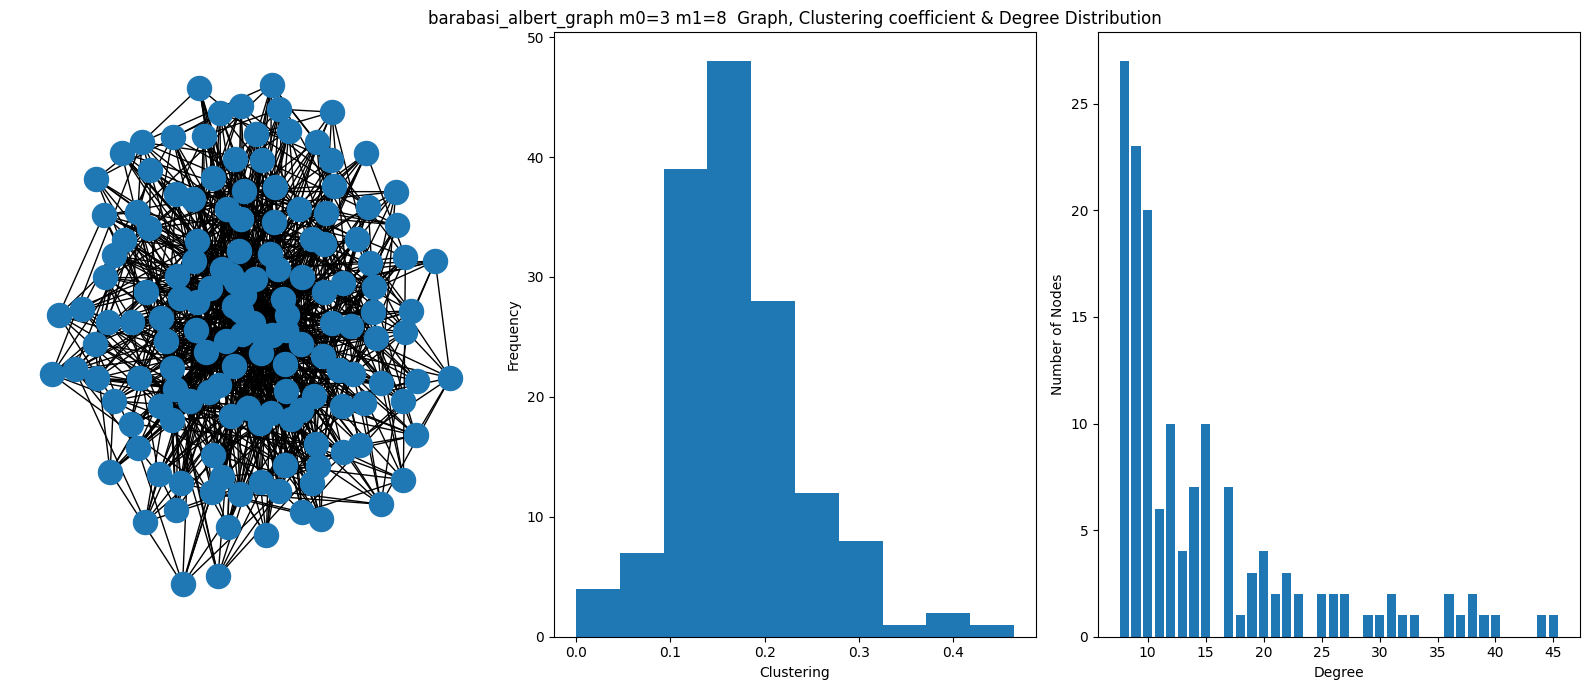

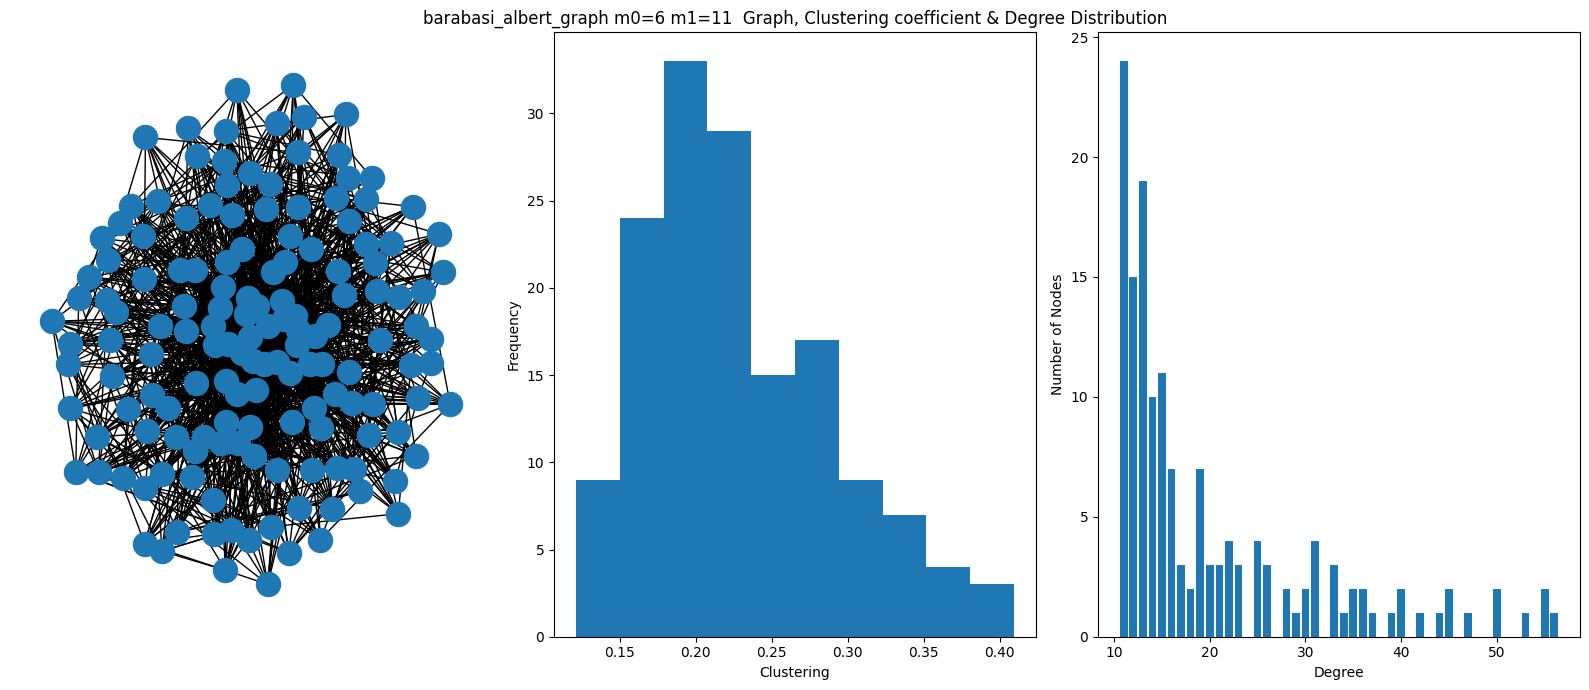

In [10]:
initial_G0=nx.barabasi_albert_graph(25, 5, seed=155,)
initial_G1=nx.barabasi_albert_graph(15, 3, seed=155,)
initial_G2=nx.barabasi_albert_graph(20, 6, seed=155,)
BG0=nx.barabasi_albert_graph(facebook_nd,1, seed=25, initial_graph=initial_G0)
BG1=nx.barabasi_albert_graph(facebook_nd,3, seed=25, initial_graph=initial_G1)
BG2=nx.barabasi_albert_graph(facebook_nd,5, seed=25, initial_graph=initial_G2)
BG3=nx.barabasi_albert_graph(facebook_nd,4, seed=25, initial_graph=initial_G0)
BG4=nx.barabasi_albert_graph(facebook_nd,9, seed=25, initial_graph=initial_G1)
BG5=nx.barabasi_albert_graph(facebook_nd,7, seed=25, initial_graph=initial_G2)
BG6=nx.barabasi_albert_graph(facebook_nd,10, seed=25, initial_graph=initial_G0)
BG7=nx.barabasi_albert_graph(facebook_nd,8, seed=25, initial_graph=initial_G1)
BG8=nx.barabasi_albert_graph(facebook_nd,11, seed=25, initial_graph=initial_G2)

barabasi_graph(BG0,'BG0',1,5)
barabasi_graph(BG1,'BG1',3,3)
barabasi_graph(BG2,'BG2',5,6)
barabasi_graph(BG3,'BG3',4,5)
barabasi_graph(BG4,'BG4',9,3)
barabasi_graph(BG5,'BG5',7,6)
barabasi_graph(BG6,'BG6',10,5)
barabasi_graph(BG7,'BG7',8,3)
barabasi_graph(BG8,'BG8',11,6)


# (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?



## (a)Facebook-Ego network

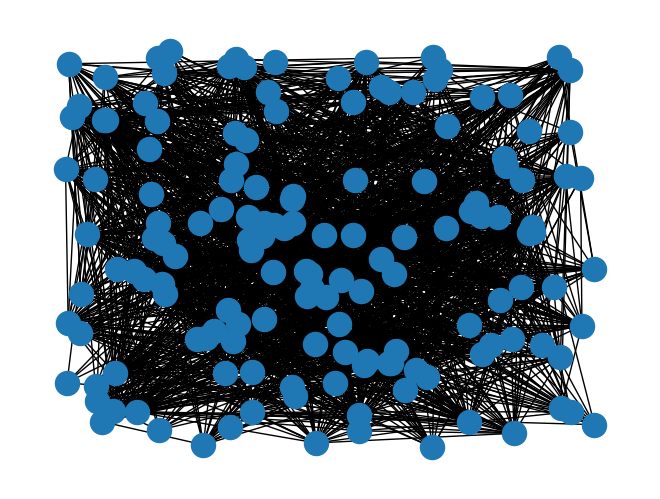

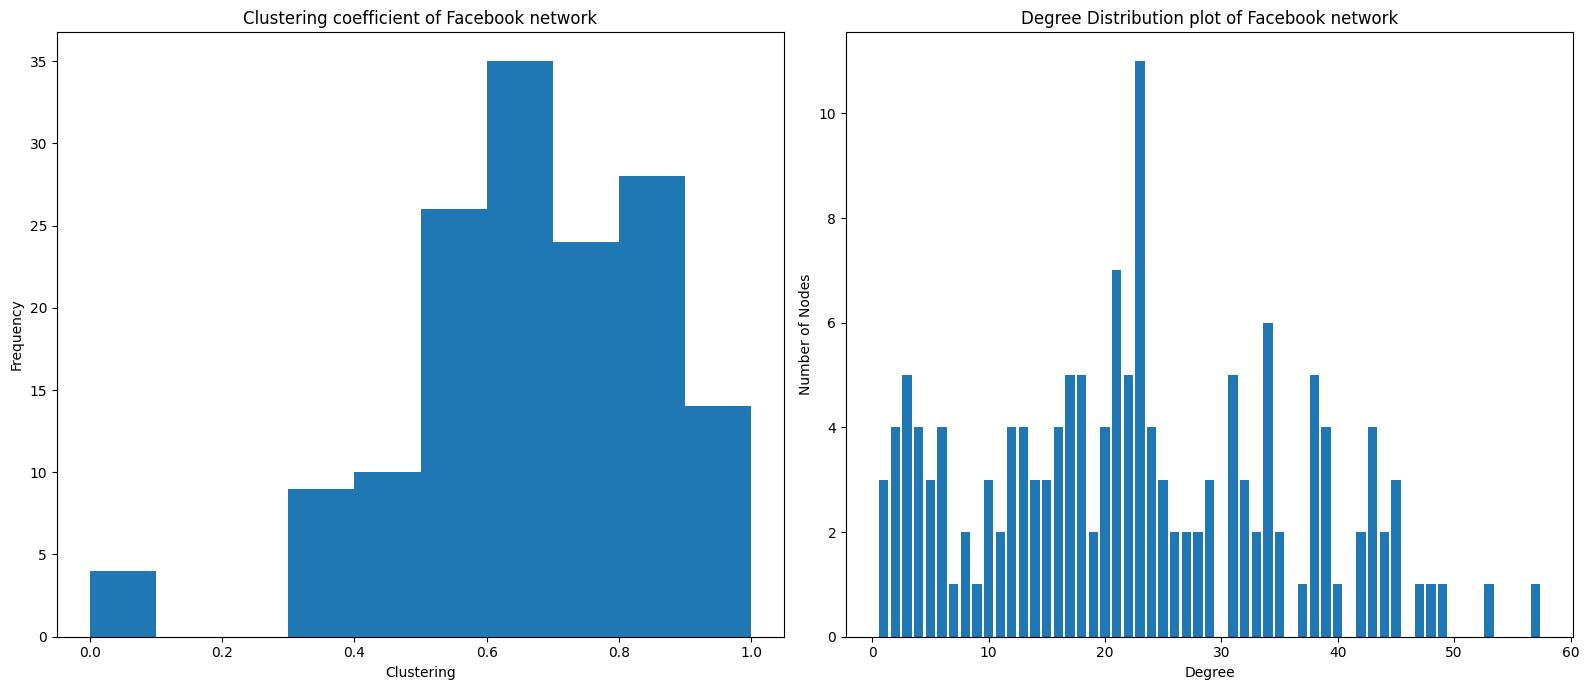

In [11]:
nx.draw_random(facebook_network)
plot_degree_dist_cluster(facebook_network,'Facebook network')

When examining the degree distribution within the Facebook Network (referred to as "facebook_network"), it becomes evident that the distribution closely resembles a normal distribution, somewhat akin to a random network.
It's well-established that in random networks, degree distribution often adheres to a normal distribution. However, it's worth noting that the above mentioned graphs represent scale-free networks, characterized by a power-law distribution, setting them apart from all other networks.
Additionally, the clustering coefficient distribution exhibits a noticeable negative skew, further distinguishing it from the characteristics of other networks.




## (b) Tweeter-Ego Network

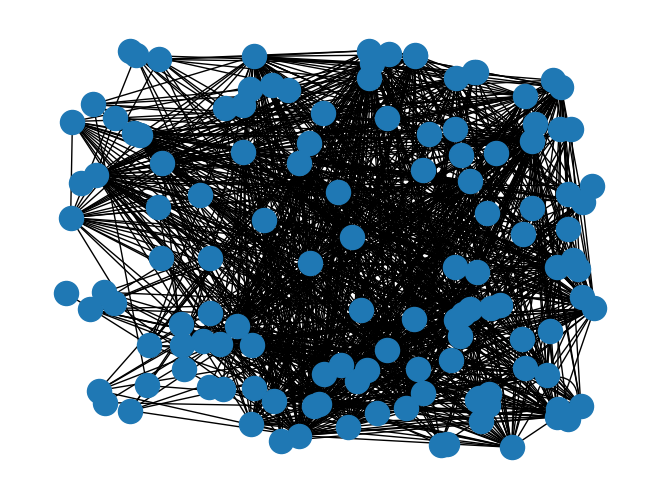

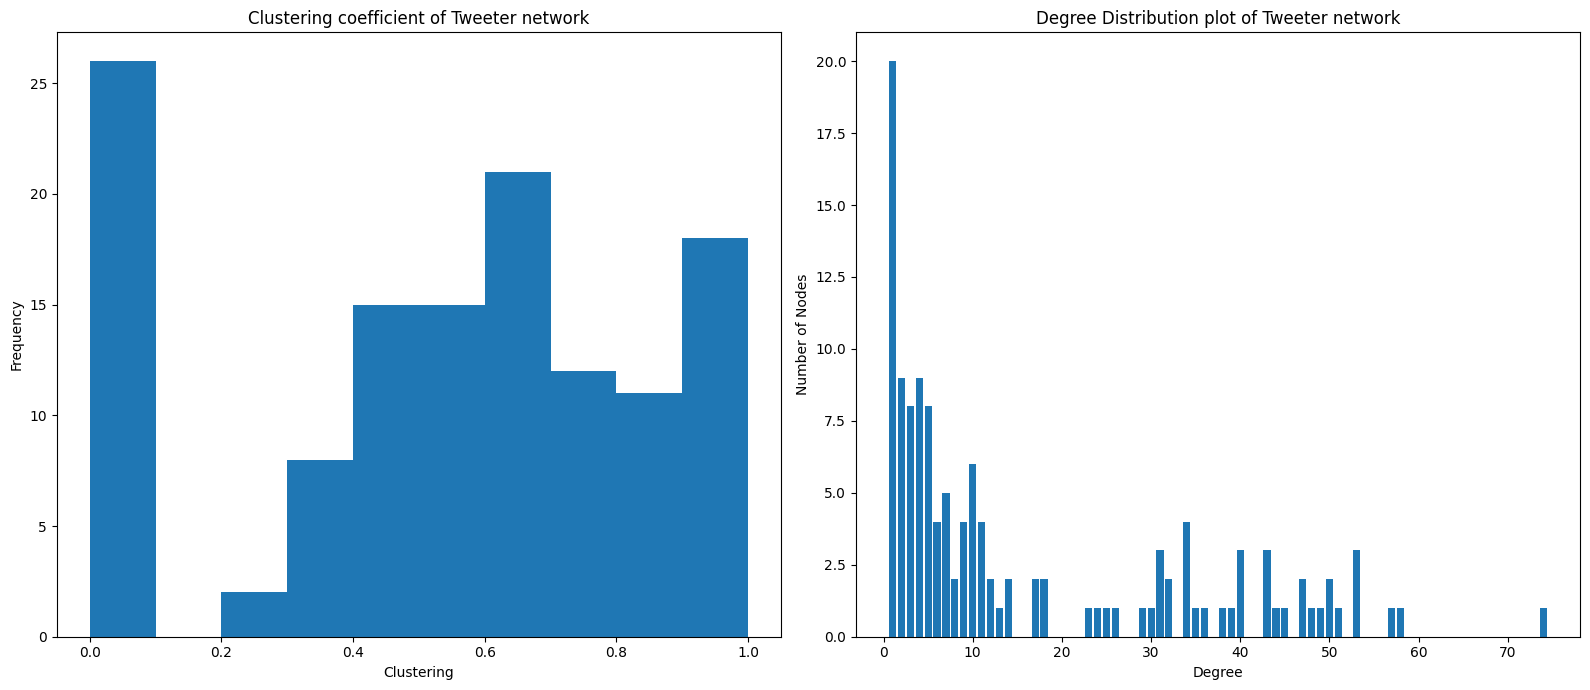

In [12]:
nx.draw_random(twitter_network)
plot_degree_dist_cluster(twitter_network,'Tweeter network')

From the preceding analysis, it is evident that the degree distribution and clustering coefficient distribution of the Twitter ego network closely resemble the power law distribution and the normal distribution centered around 0.5. When considering all parameters for the Watts-Strogatz Model, the scale-free network, and the Barabasi-Albert Model, the degree distribution aligns most closely with the Facebook Ego network in the case of the Barabasi-Albert Model and the scale-free network. Furthermore, the clustering coefficient distribution exhibits similarities in both models.